<a href="https://colab.research.google.com/github/Rogerio-mack/VLF/blob/main/goes_G7_test_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def read_7ghz(anon, nomen, path, hi, mi, hf, mf):
    # Função principal

    ano = str(anon).strip()
    name = path + nomen

    # Processamento do nome do arquivo
    nomen = nomen.strip()
    if len(nomen) < 8:
        mes, dia, anom, horam = int(nomen[0]), int(nomen[1:3]), int(nomen[3:5]), int(nomen[5:7])
    else:
        mes, dia, anom, horam = int(nomen[0:2]), int(nomen[2:4]), int(nomen[4:6]), int(nomen[6:8])

    anos = f"{anom:02d}"
    horas = f"{horam:02d}"
    mess = f"{mes:02d}"
    dias = f"{dia:02d}"
    nome = mess + dias + anos + horas
    nomegoes = mess + dias
    datas = f"{mes}/{dia}/{ano}"

    # Leitura do arquivo
    npoints = 0
    with open(name, 'rb') as f:
        # Pular o cabeçalho
        f.readline()
        while True:
            chunk = f.read(7 * 100 * 2)  # Assumindo 2 bytes por int
            if not chunk:
                break
            npoints += 100
    npoints -= 100

    # Cálculos de tempo
    tmin = hi * 3600 + mi * 60
    tmax = hf * 3600 + mf * 60

    ymin = 0 if int(ano) < 2001 else -32000
    ymax = 4000 if int(ano) < 2001 else 32000

    # Leitura do cabeçalho para obter informações de resolução
    with open(name, 'rb') as f:
        header = f.readline().decode('utf-8', errors='ignore').split(' ')
        print(header)

    resol1 = 700 # int(header[5].split()[-1])
    resol2 = 1.0 # float(header[6])
    rt = 7 / (resol1 * 100 + resol2)

    # Cálculos de índices
    h0 = int(11) * 3600 + int(8) * 60 + int(3) # int(header[0][:2]) * 3600 + int(header[0][2:4]) * 60 + int(header[1])
    xmin = int((tmin - h0) / rt)
    xmax = int((tmax - h0) / rt)
    print(xmin, xmax)
    npoints = xmax - xmin

    dim = npoints + 1
    step = max(1, int(npoints / dim - 1))
    kindex = dim - 1
    nrt = rt * step

    # Leitura dos dados
    canal_R = np.zeros(kindex - 100, dtype=int)
    canal_L = np.zeros(kindex - 100, dtype=int)

    i = 0
    with open(name, 'rb') as f:
        f.readline()  # Pular cabeçalho
        # f.seek(xmin * 7 * 2, 1)  # Posicionar no ponto inicial
        data = np.fromfile(f, dtype=np.int16, count=(kindex-100)*7).reshape(-1, 7).T
        canal_R = data[0]
        canal_L = data[1]
        print(len(canal_L), len(canal_R))
        print(canal_R)
        print(canal_L)

    t = np.arange(kindex - 100) * nrt + tmin

    # Conversão de tempo para formato de hora
    time = [timedelta(seconds=int(ti)) + datetime(int(ano), int(mess), int(dias)) for ti in t]

    # Plotagem
    plt.figure(figsize=(12, 6))
    plt.plot(time, canal_R, label='Canal R')
    plt.plot(time, canal_L, label='Canal L')
    plt.xlabel('Tempo')
    plt.ylabel('Intensidade')
    plt.title(f'Dados 7GHz - {datas}')
    plt.legend()
    plt.grid(True)
    plt.gcf().autofmt_xdate()  # Rotaciona e formata os rótulos de data
    plt.tight_layout()

    # Salvar o gráfico
    plt.savefig(f'7ghz_{nomegoes}.png')
    plt.close()

    return canal_R, canal_L, time

# Exemplo de uso da função
ano = 2025
nomen = "03130811"
path = "/content/"
hi, mi = 0, 0  # hora inicial, minuto inicial
hf, mf = 23, 59  # hora final, minuto final

canal_R, canal_L, time = read_7ghz(ano, nomen, path, hi, mi, hf, mf)

# Você pode fazer mais processamento com canal_R, canal_L e time aqui, se necessário


['', '11', '', '8', '', '3', '', 'ScRate:', '', '0.0', 'SampRate:', '', '700.0', 'Pts', 'Averg:', '', '1]5+\x05', "\x05\x02#\re5c+\x04\x01\x03\x08c5l+\x05\x0ea\x0fB\x10u5q+I\x01k5u+A\t\x0bn\x10(\x08y5o+/\x04_\x02\x0cm5s+\x04\x00L\x03n5~+\x04&\x0e\x1e\x0f6\x10_5k+u\x00t5+\tn\x0b.\x10\x075+'\x03B\x02\x0ce5p+\x04i\x00\x02?h5l+]\x05e\x0e\x10\x0f%\x10n5v+|\x1fE`\x0b\x01V5h+\t9\x0b\x0fl\x07r5+\x1b\x04E\x02\x0c^5n+$\x04@\x00\x02PQ5U+}\x051\x0e\x0e\x0fX5[+of}]6\x01d5u+&\t\x0b\x0b\x0fu\x07r5u+\t\x04J\x02\x0cV5w+r\x04g\x00\x02mt5i+)\x052\x0e\x0f\x0f\x0f_5+vI\x00L5t+\tG\x0b\x0f{\x07j5v+Q\x06\x04i\x02\x0c]5+\x04G\x00\x02\x04_5n+\x05r\x0e4\x0f\x0fg5w+=UO\n"]
-400835726 462576608
3550271 3550271
[ 24577  16391  24589 ... -24322 -28656 -28929]
[-31691  32565  28213 ... -24546  29470 -28386]


In [24]:
xmin

NameError: name 'xmin' is not defined

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def read_7ghz(anon, nomen, path, hi, mi, hf, mf):
    # Função principal

    ano = str(anon).strip()
    name = path + nomen

    # Processamento do nome do arquivo
    nomen = nomen.strip()
    if len(nomen) < 8:
        mes, dia, anom, horam = int(nomen[0]), int(nomen[1:3]), int(nomen[3:5]), int(nomen[5:7])
    else:
        mes, dia, anom, horam = int(nomen[0:2]), int(nomen[2:4]), int(nomen[4:6]), int(nomen[6:8])

    anos = f"{anom:02d}"
    horas = f"{horam:02d}"
    mess = f"{mes:02d}"
    dias = f"{dia:02d}"
    nome = mess + dias + anos + horas
    nomegoes = mess + dias
    datas = f"{mes}/{dia}/{ano}"

    # Leitura do arquivo
    npoints = 0
    with open(name, 'rb') as f:
        # Pular o cabeçalho
        f.readline()
        while True:
            chunk = f.read(7 * 100 * 2)  # Assumindo 2 bytes por int
            if not chunk:
                break
            npoints += 100
    npoints -= 100

    # Cálculos de tempo
    tmin = hi * 3600 + mi * 60
    tmax = hf * 3600 + mf * 60

    ymin = 0 if int(ano) < 2001 else -32000
    ymax = 4000 if int(ano) < 2001 else 32000

    # Leitura do cabeçalho para obter informações de resolução
    with open(name, 'rb') as f:
        header = f.readline().decode('utf-8', errors='ignore').split(' ')
        print(header)

    resol1 = 700 # int(header[5].split()[-1])
    resol2 = 1.0 # float(header[6])
    rt = 7 / (resol1 * 100 + resol2)

    # Cálculos de índices
    h0 = int(11) * 3600 + int(8) * 60 + int(3) # int(header[0][:2]) * 3600 + int(header[0][2:4]) * 60 + int(header[1])
    xmin = int((tmin - h0) / rt)
    xmax = int((tmax - h0) / rt)
    print(xmin, xmax)
    npoints = xmax - xmin

    dim = npoints + 1
    step = max(1, int(npoints / dim - 1))
    kindex = dim - 1
    nrt = rt * step

    # Leitura dos dados
    canal_R = np.zeros(kindex - 100, dtype=int)
    canal_L = np.zeros(kindex - 100, dtype=int)

    i = 0
    with open(name, 'rb') as f:
        f.readline()  # Pular cabeçalho
        # f.seek(xmin * 7 * 2, 1)  # Posicionar no ponto inicial
        data = np.fromfile(f, dtype=np.int16, count=(kindex-100)*7).reshape(-1, 7).T
        canal_R = data[0]
        canal_L = data[1]
        print(len(canal_L), len(canal_R))
        print(canal_R)
        print(canal_L)



    return canal_R, canal_L

# Exemplo de uso da função
ano = 2025
nomen = "03130811"
path = "/content/"
hi, mi = 0, 0  # hora inicial, minuto inicial
hf, mf = 23, 59  # hora final, minuto final

canal_R, canal_L = read_7ghz(ano, nomen, path, hi, mi, hf, mf)

# Você pode fazer mais processamento com canal_R, canal_L e time aqui, se necessário


['', '11', '', '8', '', '3', '', 'ScRate:', '', '0.0', 'SampRate:', '', '700.0', 'Pts', 'Averg:', '', '1]5+\x05', "\x05\x02#\re5c+\x04\x01\x03\x08c5l+\x05\x0ea\x0fB\x10u5q+I\x01k5u+A\t\x0bn\x10(\x08y5o+/\x04_\x02\x0cm5s+\x04\x00L\x03n5~+\x04&\x0e\x1e\x0f6\x10_5k+u\x00t5+\tn\x0b.\x10\x075+'\x03B\x02\x0ce5p+\x04i\x00\x02?h5l+]\x05e\x0e\x10\x0f%\x10n5v+|\x1fE`\x0b\x01V5h+\t9\x0b\x0fl\x07r5+\x1b\x04E\x02\x0c^5n+$\x04@\x00\x02PQ5U+}\x051\x0e\x0e\x0fX5[+of}]6\x01d5u+&\t\x0b\x0b\x0fu\x07r5u+\t\x04J\x02\x0cV5w+r\x04g\x00\x02mt5i+)\x052\x0e\x0f\x0f\x0f_5+vI\x00L5t+\tG\x0b\x0f{\x07j5v+Q\x06\x04i\x02\x0c]5+\x04G\x00\x02\x04_5n+\x05r\x0e4\x0f\x0fg5w+=UO\n"]
-400835726 462576608
3550271 3550271
[ 24577  16391  24589 ... -24322 -28656 -28929]
[-31691  32565  28213 ... -24546  29470 -28386]


In [8]:
# Assuming the start time is 11:08:03 as indicated in the header
ano = 2025
nomen = "03130811"
path = "/content/"
hi, mi = 0, 0  # hora inicial, minuto inicial
hf, mf = 23, 59  # hora final, minuto final

# Call the function to get the necessary data
canal_R, canal_L = read_7ghz(ano, nomen, path, hi, mi, hf, mf)

# Extract month and day from the filename for the start time
# Assuming the format is MM DD YY HH
if len(nomen) < 8:
    mes, dia, anom, horam = int(nomen[0]), int(nomen[1:3]), int(nomen[3:5]), int(nomen[5:7])
else:
    mes, dia, anom, horam = int(nomen[0:2]), int(nomen[2:4]), int(nomen[4:6]), int(nomen[6:8])

start_time = datetime(ano, mes, dia, 11, 8, 3)


# Generate a time index with 0.01 second increments
time_index = [start_time + timedelta(seconds=i * 0.01) for i in range(len(canal_R))]

# You can now use time_index for plotting or further analysis

['', '11', '', '8', '', '3', '', 'ScRate:', '', '0.0', 'SampRate:', '', '700.0', 'Pts', 'Averg:', '', '1]5+\x05', "\x05\x02#\re5c+\x04\x01\x03\x08c5l+\x05\x0ea\x0fB\x10u5q+I\x01k5u+A\t\x0bn\x10(\x08y5o+/\x04_\x02\x0cm5s+\x04\x00L\x03n5~+\x04&\x0e\x1e\x0f6\x10_5k+u\x00t5+\tn\x0b.\x10\x075+'\x03B\x02\x0ce5p+\x04i\x00\x02?h5l+]\x05e\x0e\x10\x0f%\x10n5v+|\x1fE`\x0b\x01V5h+\t9\x0b\x0fl\x07r5+\x1b\x04E\x02\x0c^5n+$\x04@\x00\x02PQ5U+}\x051\x0e\x0e\x0fX5[+of}]6\x01d5u+&\t\x0b\x0b\x0fu\x07r5u+\t\x04J\x02\x0cV5w+r\x04g\x00\x02mt5i+)\x052\x0e\x0f\x0f\x0f_5+vI\x00L5t+\tG\x0b\x0f{\x07j5v+Q\x06\x04i\x02\x0c]5+\x04G\x00\x02\x04_5n+\x05r\x0e4\x0f\x0fg5w+=UO\n"]
-400835726 462576608
3550271 3550271
[ 24577  16391  24589 ... -24322 -28656 -28929]
[-31691  32565  28213 ... -24546  29470 -28386]


In [10]:
import pandas as pd
df = pd.DataFrame({'Time': time_index, 'Canal_R': canal_R, 'Canal_L': canal_L})

In [12]:
df.head()

,Time,Canal_R,Canal_L
0,2025-03-13 11:08:03.000,24577,-31691
1,2025-03-13 11:08:03.010,16391,32565
2,2025-03-13 11:08:03.020,24589,28213
3,2025-03-13 11:08:03.030,26622,25397
4,2025-03-13 11:08:03.040,24335,-26827


In [13]:
df = df.set_index('Time').resample('min').mean()
display(df.head())

,Canal_R,Canal_L
Time,,
2025-03-13 11:08:00,13489.020000,15000.016491
2025-03-13 11:09:00,20062.582000,18948.059167
2025-03-13 11:10:00,19456.112833,16518.874500
2025-03-13 11:11:00,18312.352833,15966.257667
2025-03-13 11:12:00,18437.461833,14889.392667


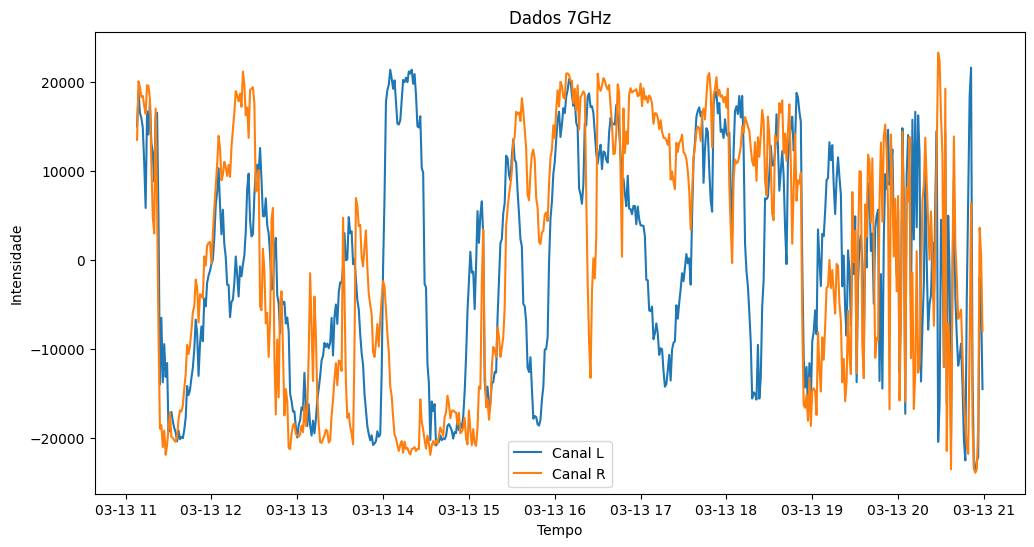

In [19]:
fig, ax = plt.subplots(1,1,figsize=(12, 6))

ax.plot(df['Canal_L'], label='Canal L')
ax.plot(df['Canal_R'], label='Canal R')
ax.set_xlabel('Tempo')
ax.set_ylabel('Intensidade')
ax.set_title('Dados 7GHz')
# ax.set_yscale('log')
plt.legend()

plt.show()


# Flare times on a GOES XRS plot

How to plot flare times as provided by the HEK on a GOES XRS plot.


In [20]:
!pip install sunpy[all]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.6/965.6 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.4/95.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.2/86.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.3/350.3 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.9/78.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.2/195.2 kB 1

In [21]:
import matplotlib.pyplot as plt

from sunpy.net import Fido
from sunpy.net import attrs as a
from sunpy.time import parse_time
from sunpy.timeseries import TimeSeries

Let's grab GOES XRS data for a particular time of interest and the HEK flare
data for this time from the NOAA Space Weather Prediction Center (SWPC).
Here we are searching for data from the GOES-15 satellite and for the 1-min average time-sampled data.



In [23]:
tr = a.Time('2008-03-13 11:00', '2008-03-13 22:00')
results = Fido.search(tr, a.Instrument.xrs & a.goes.SatelliteNumber(16) & a.Resolution("avg1m") | a.hek.FL & (a.hek.FRM.Name == 'SWPC'))

Then download the XRS data and load it into a TimeSeries.



In [24]:
files = Fido.fetch(results)
goes = TimeSeries(files)

Files Downloaded: 0file [00:00, ?file/s]

Next let's retrieve `~sunpy.net.hek.HEKTable` from the Fido result
and then load the first row from HEK results into ``flares_hek``.



In [25]:
hek_results = results['hek']
flares_hek = hek_results[0]

IndexError: index 0 out of range for table with length 0

In [ ]:
len(hek_results), len(goes)

Lets plot everything together.



In [ ]:
fig, ax = plt.subplots()
goes[0].plot(axes=ax)
ax.axvline(parse_time(flares_hek['event_peaktime']).datetime)
ax.axvspan(
    parse_time(flares_hek['event_starttime']).datetime,
    parse_time(flares_hek['event_endtime']).datetime,
    alpha=0.2, label=flares_hek['fl_goescls']
)
ax.legend(loc=2)
ax.set_yscale('log')
ax.set_xlim(tr.start.to_datetime(), tr.end.to_datetime())

plt.show()

In [ ]:
import numpy as np

np.array([10**-exp for exp in range(3, 11)])

In [ ]:
from datetime import timedelta

flare_type = 'X'
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(goes[0].to_dataframe()['xrsa'], lw=1, color='r',label='xrsa',alpha=0.8)
ax.plot(goes[0].to_dataframe()['xrsb'], lw=1, color='b',label='xrsb',alpha=0.8)

for i in range(1,len(goes)):
  # goes[i].plot(axes=ax)
  ax.plot(goes[i].to_dataframe()['xrsa'], lw=1, color='r',alpha=0.8)
  ax.plot(goes[i].to_dataframe()['xrsb'], lw=1, color='b',alpha=0.8)

nr_flares = 1
for i in range(len(hek_results)):
  flares_hek = hek_results[i]
  if str(flares_hek['fl_goescls'])[0] == str(flare_type):
    ax.axvline(parse_time(flares_hek['event_peaktime']).datetime,linestyle=':',color='k')
    ax.axvspan(
        parse_time(flares_hek['event_starttime']).datetime,
        parse_time(flares_hek['event_endtime']).datetime,
        alpha=0.2,) # label=flares_hek['fl_goescls'])
    ax.text(parse_time(flares_hek['event_peaktime']).datetime + timedelta(hours=2),15**-(3+(nr_flares%3)/6),str(flares_hek['fl_goescls']),fontsize=8)
    nr_flares = nr_flares+1

for exp in range(3, 10):
  ax.axhline(10**-exp, lw=0.5, color='grey', linestyle='dashed')

ax.legend(loc=2)
ax.set_yscale('log')
ax.set_xlim(tr.start.to_datetime(), tr.end.to_datetime())

ax2 = ax.twinx()
ax2.set_yscale('log')
ax2.set_yticks(np.array([10**-(exp+0.5) for exp in range(3,8)]))
ax2.set_yticklabels(['X','M','C','B','A'],fontweight='bold')
ax2.set_ylim(ax.get_ylim())

ax.set_title(f"GOES-16 XRS - Flares {flare_type}\n {tr.start.to_datetime().strftime('%Y-%m-%d %Hh%Mm%Ss')} - {tr.end.to_datetime().strftime('%Y-%m-%d %Hh%Mm%Ss')}")

plt.show()